# Twitter-US-Airlines-Sentiment

The following notebook demonstrate how to perform sentiment analysis using [ULMFiT](https://arxiv.org/abs/1801.06146) on twiter us airlines data set taken from [kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) competition.

## Sentiment Analysis

Sentiment analysis is a Natural Language Processing (NLP) problem which aims to classify what is the sentiment associated with a given inputed text. 

## ULMFiT 

ULMFit as a language model which was developed with insperation from inductive transfer learning which is prevelant in computer vision IMAGENET. The basic idea is that a language model shouldn't have to relearn for each task teh basic foundations of a given language (i.e. what is a valid word). Therefore, ULMFit was trained on a large corpus in order to learn language and then we finetune the model for our specific task.

# Data Analysis

In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
# from sklearn.cross_validation import train_test_split
import numpy

In [2]:
Tweet= pandas.read_csv("./Tweets/Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [4]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [5]:
Mood_count=Tweet['airline_sentiment'].value_counts()

Text(0.5, 1.0, 'Count of Moods')

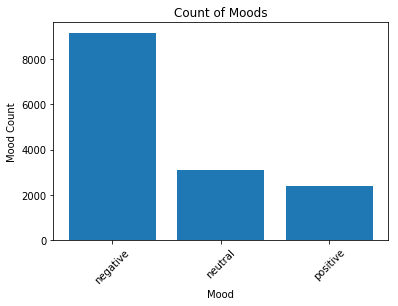

In [6]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [7]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

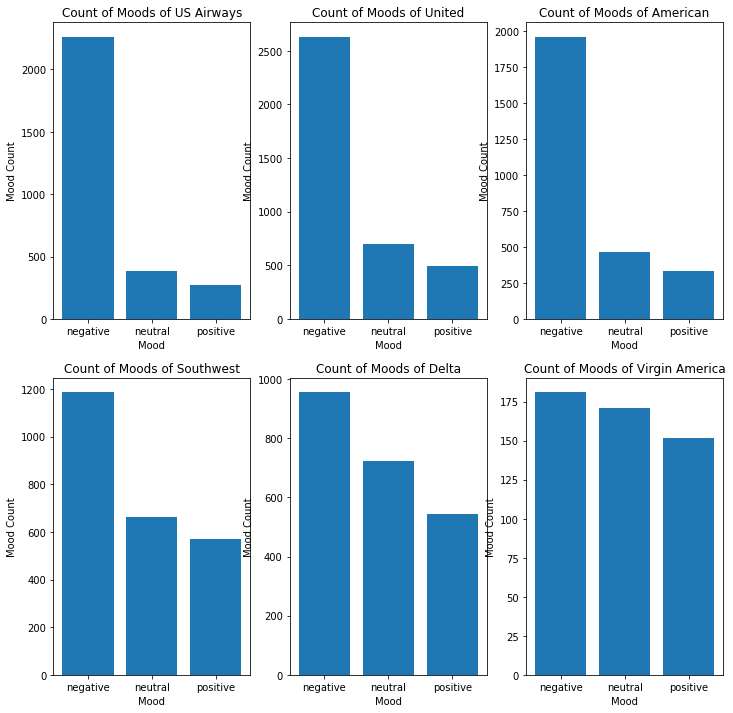

In [8]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
    
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the above plots we see that the first three airlines are always skewed toward negative moods, while the later three airlines the sentiment is more balanced.

In [9]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [10]:
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [11]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    plt.show()

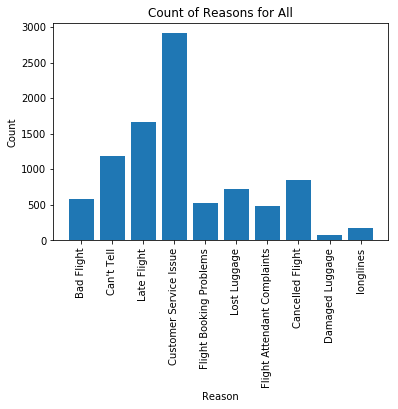

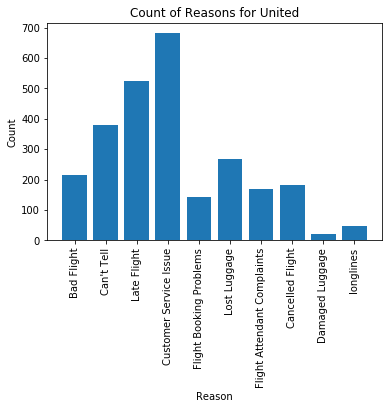

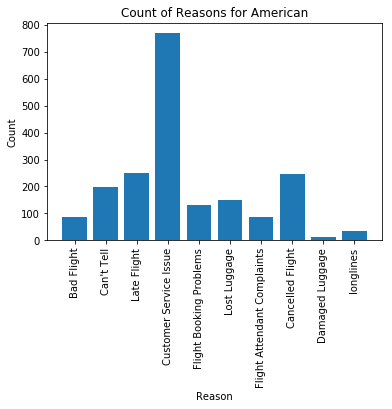

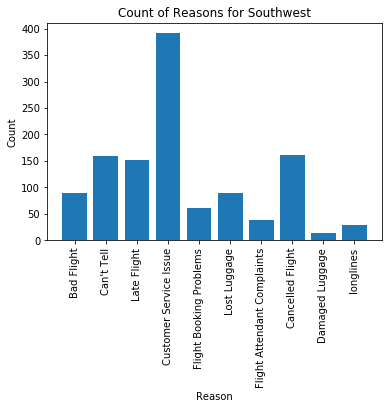

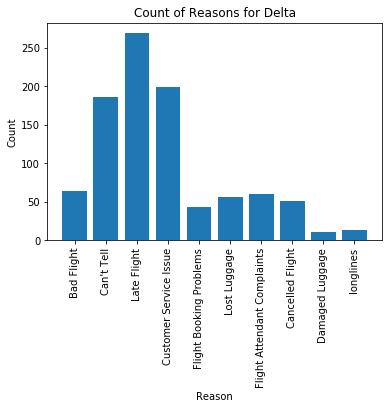

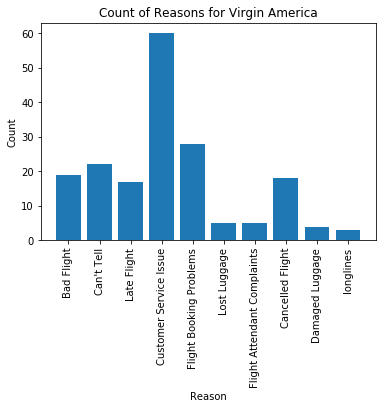

In [12]:
airline_names = ['All', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
for airline_name in airline_names:
    plot_reason(airline_name)

In [13]:
#!pip install wordcloud

bellow we plot the word cloud of each sentiment within a confidence range in order to get a sense of which words are most frequently used in each type of tweet.

In [14]:
from wordcloud import WordCloud,STOPWORDS

In [15]:
def plt_wordcloud(sentiment, confidence=-1):
    df=Tweet[Tweet['airline_sentiment']==sentiment]
    if confidence!=-1:
        df = df[df['airline_sentiment_confidence']<confidence]
    words = ' '.join(df['text'])
    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
    
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

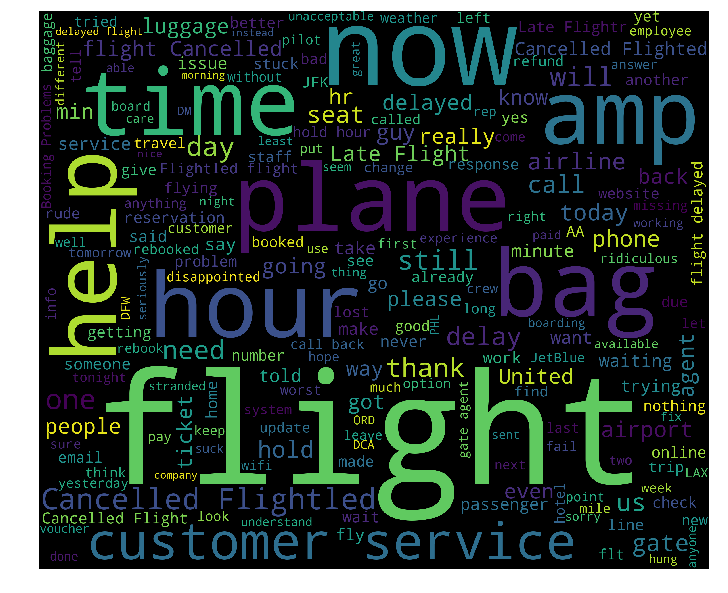

In [16]:
plt_wordcloud('negative')

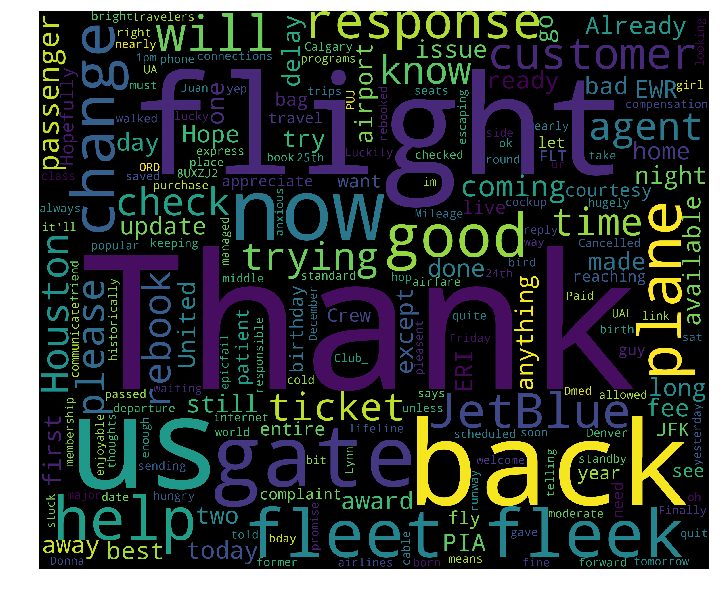

In [17]:
plt_wordcloud('negative',0.5)

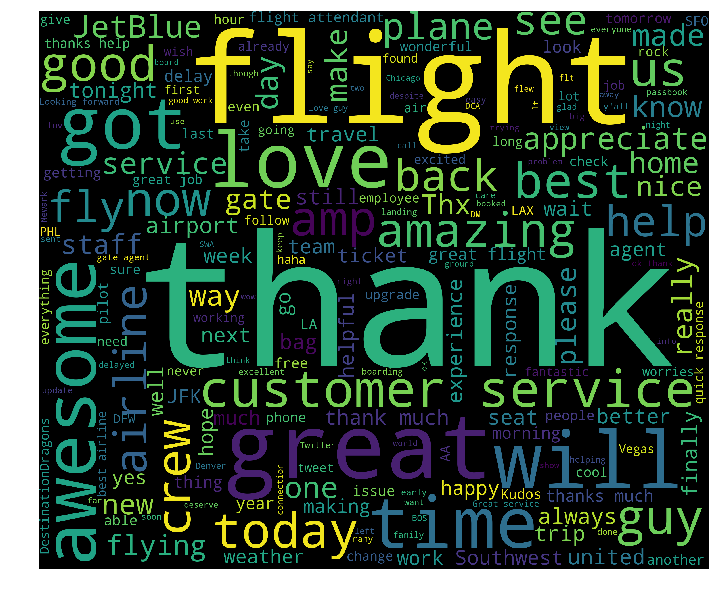

In [18]:
plt_wordcloud('positive')

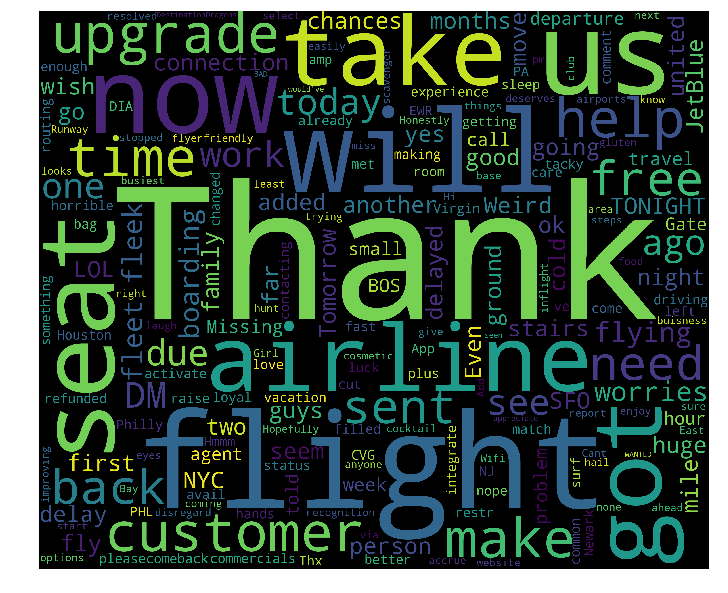

In [19]:
plt_wordcloud('positive',0.5)

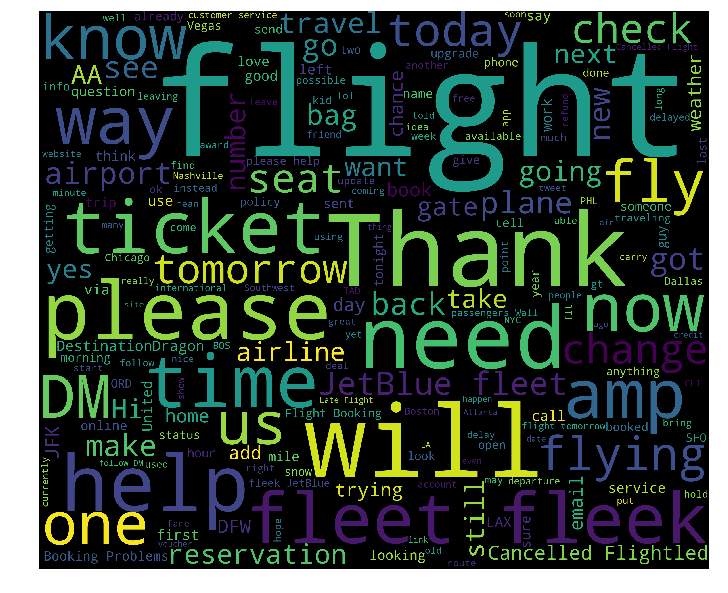

In [20]:
plt_wordcloud('neutral')

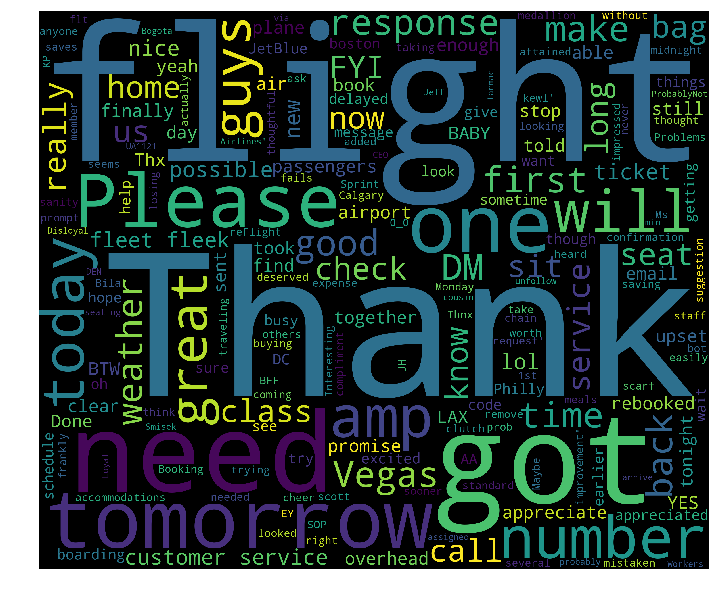

In [21]:
plt_wordcloud('neutral',0.5)

its not suprising to see that certain words (i.e. Thank) are very frequent in both negative and positive sentiment in confidence intervals less than 0.5 

# Preprocessing

In [22]:
def label(x):
    if x=='negative':
        return -1
    elif x=='positive':
        return 1
    return 0
Tweet['label']=Tweet['airline_sentiment'].apply(label)
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,label
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),-1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-1


In [23]:
df = pandas.DataFrame(Tweet[['label','text']])
df.head()

,label,text
0,0,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,-1,@VirginAmerica it's really aggressive to blast...
4,-1,@VirginAmerica and it's a really big bad thing...


In [24]:
df['is_valid'] = False
#shuffle
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,label,text,is_valid
0,0,@JetBlue I was returning from @FoodNetwork #SO...,False
1,-1,"@SouthwestAir my Flt was delayed, scheduled to...",False
2,1,@USAirways @AmericanAir First Class all the wa...,False
3,-1,@USAirways It's very difficult to work with Ba...,False
4,1,@JetBlue wouldn't mind paying for the snacks b...,False


In [25]:
df[-int(df.shape[0]*0.3):].is_valid = True 
df[-int(df.shape[0]*0.3):].tail()
df.to_csv('texts.csv')

C:\Users\zvil\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
train_df = df[df['is_valid']==False]
valid_df = df[df['is_valid']==True]

# Baseline Models

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_df['text'])
test_features=v.transform(valid_df['text'])

In [29]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [30]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train_df['label'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train_df['label'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,valid_df['label'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    

C:\Users\zvil\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of LogisticRegressionis 0.6352459016393442
Accuracy of KNeighborsClassifieris 0.49681238615664847


C:\Users\zvil\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.6352459016393442
Accuracy of DecisionTreeClassifieris 0.6994535519125683
Accuracy of RandomForestClassifieris 0.7636612021857924
Accuracy of AdaBoostClassifieris 0.7388433515482696
Accuracy of GaussianNBis 0.52367941712204


# ULMFit

In [31]:
from fastai.gen_doc.nbdoc import *
from fastai.text import * 

In [32]:
path=""

### Getting your data ready for modeling

In [33]:
for file in ['train_tok.npy', 'valid_tok.npy']:
    if os.path.exists(path+'tmp'+file): os.remove(path+'tmp'+file)

To get a [`DataBunch`](/basic_data.html#DataBunch) quickly, there are also several factory methods depending on how our data is structured. They are all detailed in [`text.data`](/text.data.html#text.data), here we'll use the method <code>from_csv</code> of the [`TextLMDataBunch`](/text.data.html#TextLMDataBunch) (to get the data ready for a language model) and [`TextClasDataBunch`](/text.data.html#TextClasDataBunch) (to get the data ready for a text classifier) classes.

In [34]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df=train_df, valid_df=valid_df, path=path)
# Classifier model data
data_clas = TextClasDataBunch.from_df(path=path, train_df=train_df, valid_df=valid_df, vocab=data_lm.train_ds.vocab, bs=32)

This does all the necessary preprocessing behind the scene. For the classifier, we also pass the vocabulary (mapping from ids to words) that we want to use: this is to ensure that `data_clas` will use the same dictionary as `data_lm`.

Since this step can be a bit time-consuming, it's best to save the result with:

In [35]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')

This will create a 'tmp' directory where all the computed stuff will be stored. You can then reload those results with:

In [36]:
data_lm = TextLMDataBunch.load(path,'data_lm_export.pkl')
data_clas = TextClasDataBunch.load(path,'data_clas_export.pkl', bs=16)

Note that you can load the data with different [`DataBunch`](/basic_data.html#DataBunch) parameters (batch size, `bptt`,...)

### Fine-tuning a language model

We can use the `data_lm` object we created earlier to fine-tune a pretrained language model. [fast.ai](http://www.fast.ai/) has an English model with an AWD-LSTM architecture available that we can download. We can create a learner object that will directly create a model, download the pretrained weights and be ready for fine-tuning.

In [37]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,5.447886,4.616641,0.182420


Like a computer vision model, we can then unfreeze the model and fine-tune it.

In [38]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy
1,4.425129,4.085170,0.242023


To evaluate your language model, you can run the [`Learner.predict`](/basic_train.html#Learner.predict) method and specify the number of words you want it to guess.

In [39]:
learn.predict("This is a review about", n_words=10)

'This is a review about snowboard cool overflight alerts yvr manager bday galley correct woven'

It doesn't make much sense (we have a tiny vocabulary here and didn't train much on it) but note that it respects basic grammar (which comes from the pretrained model).

Finally we save the encoder to be able to use it for classification in the next section.

In [40]:
learn.save_encoder('ft_enc')

### Building a classifier

We now use the `data_clas` object we created earlier to build a classifier with our fine-tuned encoder. The learner object can be done in a single line.

In [41]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [42]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup xxunk - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup xxunk 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag xxunk for xxup jac - xxup lax ?,0
"xxbos @americanair looks like i have . xxmaj best i can hope for i guess . xxmaj it 's on us air , so i do n't think i 'll get miles on xxmaj alaska . xxmaj which sucks .",-1
"xxbos @americanair xxmaj you did n't call , did you . xxmaj try it , and then you 'll understand . xxmaj it 's not possible to reach an agent , i do n't know what else to do",-1
"xxbos @united i am . xxmaj who knows where my bags are . xxmaj do i just wait around and hope they arrive ? xxmaj no one has answers , i have plans and no answers xxrep 4 .",-1
xxbos @usairways yesterday we were delayed for xxup six hours w / lil to xxup no explanation we paid xxup lots of $ $ 2 fly w / u & & this is how u treat ur customers ?,-1


In [43]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.785324,0.791378,0.738388


Again, we can unfreeze the model and fine-tune it.

In [44]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy
1,0.698302,0.593646,0.765938


In [45]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy
1,0.650381,0.562975,0.788934


Again, we can predict on a raw text by using the [`Learner.predict`](/basic_train.html#Learner.predict) method.

In [46]:
learn.predict("This was a great flight!")

(Category 1, tensor(2), tensor([5.1869e-15, 1.6907e-16, 1.0000e+00]))

In [47]:
learn.save("sent0")

## Multi-task learning
Next we will test a hypothesis that multi task learning both the sentiment and the confidence of the sentiment (airline_sentiment_confidence) should imporve results.

What it is
>wikipedia: Multi-task learning (MTL) is a subfield of machine learning in which multiple learning tasks are solved at the same time, while exploiting commonalities and differences across tasks.

Why do it
>wikipedia: This can result in improved learning efficiency and prediction accuracy for the task-specific models, when compared to training the models separately.


Steps:
1. Load trained sentiment model and train on airline_sentiment_confidence
2. Re-train sentiment


In [48]:
df_conf = pandas.DataFrame(Tweet[['label','airline_sentiment_confidence','text']])
df_conf['label'] = df_conf['label']*df_conf['airline_sentiment_confidence']
df_conf = pandas.DataFrame(df_conf[['label','text']])
df_conf.head()

,label,text
0,0.0000,@VirginAmerica What @dhepburn said.
1,0.3486,@VirginAmerica plus you've added commercials t...
2,0.0000,@VirginAmerica I didn't today... Must mean I n...
3,-1.0000,@VirginAmerica it's really aggressive to blast...
4,-1.0000,@VirginAmerica and it's a really big bad thing...


In [49]:
df_conf['is_valid'] = False
#shuffle
df_conf = df_conf.sample(frac=1).reset_index(drop=True)
df_conf.head()

,label,text,is_valid
0,0.0,@virginamerica may start service to Hawaii fro...,False
1,-1.0,@united who compensates is for the delays caus...,False
2,-1.0,@united which is why my next flights to Miami ...,False
3,-1.0,@USAirways now on hold for 2 hrs 20 min. This ...,False
4,-1.0,@USAirways testing my patience this evening (o...,False


In [50]:
df_conf[-int(df.shape[0]*0.3):].is_valid = True 
df_conf[-int(df.shape[0]*0.3):].tail()
df_conf.to_csv('texts_conf.csv')

C:\Users\zvil\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [51]:
train_conf_df = df[df['is_valid']==False]
valid_conf_df = df[df['is_valid']==True]

In [52]:
data_conf = TextClasDataBunch.from_df(path=path, train_df=train_conf_df, valid_df=valid_conf_df, vocab=data_lm.train_ds.vocab, bs=32)
data_conf.save('data_conf_export.pkl')

## Confidence Pretraining

### Building a classifier

We now use the `data_conf` object we just created to build a classifier with our first trained sentiment model.

In [53]:
learn = text_classifier_learner(data_conf, drop_mult=0.5)
learn.load('sent0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList
y: CategoryList (10248 items)
[Category 0, Category -1, Category 1, Category -1, Category 1]...
Path: .
x: TextList (10248 items)
[Text xxbos @jetblue i was returning from xxunk # xxup sobewff so i had limited carry on space in my xxunk . xxmaj next flight i 'll try that snack !, Text xxbos @southwestair my xxmaj flt was delayed , scheduled to miss my connection , can i get some help ? xxup xxunk, Text xxbos @usairways @americanair xxmaj first xxmaj class all the xxunk 💺 ✈ ️ xxmaj headed to xxunk http : / / t.co / xxunk, Text xxbos @usairways xxmaj it 's very difficult to work with xxmaj baggage claims when they do n't answer the phone, Text xxbos @jetblue would n't mind paying for the snacks but no $ for tix :-) xxmaj great job guys !]...
Path: .;

Valid: LabelList
y: CategoryList (4392 items)
[Category -1, Category -1, Category 0, Category -1, Category -1]...
Path: .
x: TextList (4392 items)
[Text xxbos @united is the worst airline

In [54]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup xxunk - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup xxunk 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag xxunk for xxup jac - xxup lax ?,0
xxbos @jetblue xxmaj flight 136 departs xxunk xxup am xxmaj finally ! ! ! xxmaj arrived xxup jfk with no xxunk at xxunk xxup pm . xxmaj that 's a long flight . xxup xxunk xxup bus http : / / t.co / xxunk,-1
"xxbos @united xxmaj right now at xxmaj xxunk xxmaj air in xxmaj san xxmaj xxunk , # xxmaj xxunk . xxmaj line out the door . xxmaj all due to xxunk & & xxunk xxunk http : / / t.co / xxunk ”",-1
xxbos @usairways xxup us 728 / xxmaj feb 21 . xxmaj arrive 7 hrs xxmaj late xxmaj flight ; checked car seat missing . xxmaj no replacement available . xxmaj has yet to arrive more than 24 hours xxmaj late xxmaj flightr .,-1
xxbos 😎 xxup rt @virginamerica : xxmaj you ’ve met your match . xxmaj got status on another airline ? xxmaj upgrade ( + xxunk ) : http : / / t.co / xxunk . http : / / t.co / xxunk,1


In [55]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.892177,1.010227,0.637295


Again, we can unfreeze the model and fine-tune it.

In [56]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy
1,0.911879,0.989619,0.637750


In [57]:
learn.freeze_to(-5)
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy
1,0.875027,0.942613,0.637750


Again, we can predict on a raw text by using the [`Learner.predict`](/basic_train.html#Learner.predict) method.

In [58]:
learn.predict("This was a great flight!")

(Category -1, tensor(0), tensor([0.6055, 0.2090, 0.1855]))

In [59]:
learn.save("conf0")

## Sentiment Training

further training sent0 to compare learning from conf0

In [60]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load('sent0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList
y: CategoryList (10248 items)
[Category 0, Category -1, Category 1, Category -1, Category 1]...
Path: .
x: TextList (10248 items)
[Text xxbos @jetblue i was returning from xxunk # xxup sobewff so i had limited carry on space in my xxunk . xxmaj next flight i 'll try that snack !, Text xxbos @southwestair my xxmaj flt was delayed , scheduled to miss my connection , can i get some help ? xxup xxunk, Text xxbos @usairways @americanair xxmaj first xxmaj class all the xxunk 💺 ✈ ️ xxmaj headed to xxunk http : / / t.co / xxunk, Text xxbos @usairways xxmaj it 's very difficult to work with xxmaj baggage claims when they do n't answer the phone, Text xxbos @jetblue would n't mind paying for the snacks but no $ for tix :-) xxmaj great job guys !]...
Path: .;

Valid: LabelList
y: CategoryList (4392 items)
[Category -1, Category -1, Category 0, Category -1, Category -1]...
Path: .
x: TextList (4392 items)
[Text xxbos @united is the worst airline

In [61]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup xxunk - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup xxunk 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag xxunk for xxup jac - xxup lax ?,0
"xxbos xxmaj thank you xxmaj united ! “ @united : xxunk xxmaj that 's a beautiful place to stay a day longer . xxmaj have you been re - booked ? xxmaj if not , let me know . xxup xxunk ”",1
xxbos @southwestair xxmaj twitter cust svc rule 1 xxmaj do nt say xxup if we fell short . i just told u u did ! # 2 xxmaj if u ca nt solve problem do n't say anything at all !,-1
xxbos @united xxmaj stuck in this airport 12 hours in xxunk cuz the pilot showed up xxmaj late xxmaj flight in pjs & & i missed my xxunk flight . xxup xxunk 's i xxup tell u ! # xxup xxunk,-1
"xxbos @southwestair xxmaj flt xxunk xxmaj san xxmaj jose , xxup ca - > xxmaj denver , xxup co . xxmaj delayed 2 hrs but easily best flight + touchdown in all my years flying . xxmaj keep it up !",-1


Again, we can unfreeze the model and fine-tune it.

In [62]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy
1,0.685376,0.558832,0.791211
2,0.593741,0.504871,0.809199
3,0.643007,0.496863,0.810109


In [63]:
learn.predict("This was a great flight!")

(Category 1, tensor(2), tensor([6.2324e-08, 9.2624e-10, 1.0000e+00]))

In [64]:
learn.save("sent0_1")

### Building a classifier

We now use the `data_clas` object we previously used and the confidence model to continue learning the sentiment.

In [65]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load('conf0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList
y: CategoryList (10248 items)
[Category 0, Category -1, Category 1, Category -1, Category 1]...
Path: .
x: TextList (10248 items)
[Text xxbos @jetblue i was returning from xxunk # xxup sobewff so i had limited carry on space in my xxunk . xxmaj next flight i 'll try that snack !, Text xxbos @southwestair my xxmaj flt was delayed , scheduled to miss my connection , can i get some help ? xxup xxunk, Text xxbos @usairways @americanair xxmaj first xxmaj class all the xxunk 💺 ✈ ️ xxmaj headed to xxunk http : / / t.co / xxunk, Text xxbos @usairways xxmaj it 's very difficult to work with xxmaj baggage claims when they do n't answer the phone, Text xxbos @jetblue would n't mind paying for the snacks but no $ for tix :-) xxmaj great job guys !]...
Path: .;

Valid: LabelList
y: CategoryList (4392 items)
[Category -1, Category -1, Category 0, Category -1, Category -1]...
Path: .
x: TextList (4392 items)
[Text xxbos @united is the worst airline

In [66]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup xxunk - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup xxunk 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag xxunk for xxup jac - xxup lax ?,0
xxbos @united xxup where xxup is xxup my xxup fucking xxup bag ? ! ? ! xxmaj where the fuck is my fucking bag ? ? ? xxup tell xxup me xxup now xxup or xxup give xxup me a xxup number xxup to xxup call a xxup human . xxup xxunk m,-1
"xxbos @united flight xxmaj cancelled xxmaj flightled , and the updated one gets me into xxup bwi too xxmaj late xxmaj flight ! i 'd be fine with xxup dca or xxup iad , just arriving earlier ! xxmaj help !",-1
xxbos @united xxmaj stuck in this airport 12 hours in xxunk cuz the pilot showed up xxmaj late xxmaj flight in pjs & & i missed my xxunk flight . xxup xxunk 's i xxup tell u ! # xxup xxunk,-1
xxbos @americanair xxmaj my wife & & infant daughter are on xxup xxunk xxup xxunk - xxup dfw . xxmaj en route but delayed . xxmaj can y’ all hold xxup xxunk to xxup rdu so they can connect ?,-1


Again, we can unfreeze the model and fine-tune it.

In [67]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy
1,0.905640,0.953214,0.636157
2,0.875743,0.873671,0.636384
3,0.856498,0.873420,0.635246


Again, we can predict on a raw text by using the [`Learner.predict`](/basic_train.html#Learner.predict) method.

In [68]:
learn.predict("This was a great flight!")

(Category -1, tensor(0), tensor([0.4639, 0.1377, 0.3985]))

In [69]:
learn.save("sent1")

the above results show that training on confidence was not beneficial. Maybe a multi label output mult-task approach would prove better.

# Continue Learning (Early Stopping)

In [91]:
from fastai.callbacks.tracker import EarlyStoppingCallback
from fastai.callbacks.tracker import SaveModelCallback
from fastai.callbacks.tracker import ReduceLROnPlateauCallback

save_model = partial(SaveModelCallback, monitor='val_loss', every='improvement', name='best')
early_stop = partial(EarlyStoppingCallback, monitor='val_loss', min_delta=0.01, patience=3)
lr_schedule = partial(ReduceLROnPlateauCallback, monitor='val_loss', patience=1, factor=1.5, min_delta=0.1) 

In [92]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, callback_fns = [save_model, early_stop, lr_schedule])
learn.load('sent0_1')

RNNLearner(data=TextClasDataBunch;

Train: LabelList
y: CategoryList (10248 items)
[Category 0, Category -1, Category 1, Category -1, Category 1]...
Path: .
x: TextList (10248 items)
[Text xxbos @jetblue i was returning from xxunk # xxup sobewff so i had limited carry on space in my xxunk . xxmaj next flight i 'll try that snack !, Text xxbos @southwestair my xxmaj flt was delayed , scheduled to miss my connection , can i get some help ? xxup xxunk, Text xxbos @usairways @americanair xxmaj first xxmaj class all the xxunk 💺 ✈ ️ xxmaj headed to xxunk http : / / t.co / xxunk, Text xxbos @usairways xxmaj it 's very difficult to work with xxmaj baggage claims when they do n't answer the phone, Text xxbos @jetblue would n't mind paying for the snacks but no $ for tix :-) xxmaj great job guys !]...
Path: .;

Valid: LabelList
y: CategoryList (4392 items)
[Category -1, Category -1, Category 0, Category -1, Category -1]...
Path: .
x: TextList (4392 items)
[Text xxbos @united is the worst airline

In [ ]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup xxunk - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup xxunk 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag xxunk for xxup jac - xxup lax ?,0
"xxbos @united xxmaj right now at xxmaj xxunk xxmaj air in xxmaj san xxmaj xxunk , # xxmaj xxunk . xxmaj line out the door . xxmaj all due to xxunk & & xxunk xxunk http : / / t.co / xxunk ”",-1
xxbos @americanair xxmaj what happens when you xxunk xxmaj top xxmaj xxunk & & the xxunk of xxmaj san xxmaj xxunk de xxmaj xxunk . xxmaj my xxmaj late xxmaj flightst food blog . http : / / t.co / xxunk,0
"xxbos @jetblue you are missing the point . xxmaj the flight left an hour xxmaj late xxmaj flight . xxmaj why are you allowed to be that xxmaj late xxmaj flight , and still charge me $ 50 and 10hrs ?",-1
xxbos @americanair xxmaj hi guys . i have 2 / 25 xxup rno - xxup dfw tomorrow . xxmaj plane coming from xxup dfw with bad weather in xxunk i consider xxmaj xxunk - route as i have connect ?,0


Again, we can unfreeze the model and fine-tune it.

In [ ]:
learn.unfreeze()
learn.fit(50, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy


In [ ]:
learn.predict("This was a great flight!")

# Credits

https://www.kaggle.com/jiashenliu/how-can-we-predict-the-sentiment-by-tweets

https://www.analyticsvidhya.com/blog/2018/11/tutorial-text-classification-ulmfit-fastai-library/

https://docs.fast.ai/text.html

https://github.com/fastai/fastai/blob/0765c828a94603340e0ad269eed0ecd4e46f7ea5/docs_src/callbacks.lr_finder.ipynb

https://medium.com/@zhang_yang/multi-task-deep-learning-experiment-using-fastai-pytorch-2b5e9d078069

https://forums.fast.ai/t/a-quick-and-easy-way-to-make-ulmfit-work-for-multi-label-problems/17222

https://forums.fast.ai/t/fastai-v1-and-multilabel-ulmfit/27694